# Set Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import os
# import shutil
# from random import shufflezs
# from util import im_path_to_arr, arr_to_im_path

## 1. Plot loss and accuracy curve 

### 1.1 show results for training / fine-tune

In [ ]:
# Trainig on Brats-16 with 0.75 training and 0.25 validation
path = '/share/PI/ogevaert/raghav/results/train_results.npz'

In [30]:
# Trainig on Brats-16 with 0.8 training and 0.2 validation
path = '/share/PI/ogevaert/shirley/brats_hgg/result/fcn_train_patch48_results.npz'

In [21]:
# # Fine tune on Rembrandt with 0.15 training and 0.85 validation
# path = '/share/PI/ogevaert/raghav/results/prime_015_results.npz'

In [2]:
# Fine tune on Rembrandt with 0.2 training and 0.8 validation
path = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/fine_tune_results.npz'

In [29]:
# Fine tune on Rembrandt with 0.5 training and 0.5 validation
path = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_05/fine_tune_results.npz'

['val_fdices', 'val_bdices', 'train_losses', 'train_bdices', 'train_ex_paths', 'val_ex_paths']
Total Epoches = 7
Total Training Examples = 176
Best Segmentation Dice Score = 0.850925
[ 0.11779911  0.09015556  0.08514684  0.08422595  0.07951134  0.07759853
  0.07579618]


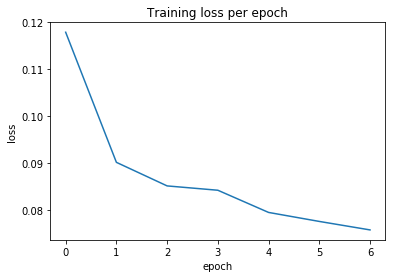

[ 0.07773883  0.81849815  0.85092515]


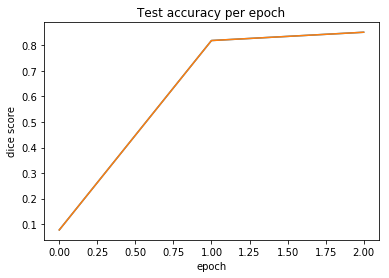

In [31]:
tmp = np.load(path)
print tmp.keys()

# loss per mini-batch / iteration (batchsize = 50)
train_loss = tmp['train_losses']
# training dice score per epoch (balanced sampling)
train_acc = tmp['train_bdices']
# validation dice score per epoch (balanced sampling)
val_acc = tmp['val_bdices']
# test dice score per epoch for final segmentation
val_f = tmp['val_fdices']

num_batch_per_ex = 20
epoches = train_acc.shape[0]
num_train = train_loss.shape[0] / num_batch_per_ex / epoches

print('Total Epoches = %d' %(epoches))
print('Total Training Examples = %d' %(num_train))
print('Best Segmentation Dice Score = %5f' %(np.max(val_f)))

# each row contains 20 batches randomly sampled from the same example
train_loss_reshape = train_loss.reshape(-1, num_batch_per_ex)
# average loss per example
train_loss_example = np.mean(train_loss_reshape, axis=1)
# each row contains all examples in training set
train_loss_example = train_loss_example.reshape(epoches,-1)
# average loss per epoch / across all examples
train_loss_epoch = np.mean(train_loss_example, axis=1)
print train_loss_epoch
## plot loss curve
plt.title('Training loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_loss_epoch)
# plt.legend('train_loss')
plt.show()

# ## plot training and validation accuracy with balanced dice score
# tacc, = plt.plot(train_acc)
# vacc, = plt.plot(val_acc)
# plt.legend([tacc, vacc], ['train_acc', 'val_acc'])
# plt.title('Training / Validation accuracy per epoch')
# plt.xlabel('epoch')
# plt.ylabel('dice score')
# # plt.axis([1,20,0.91,0.95])
# plt.show()


## plot test accuracy for volume segmentation
print(val_f)
plt.plot(val_f)
# plt.legend(['test_acc'])
plt.title('Test accuracy per epoch')
plt.xlabel('epoch')
plt.ylabel('dice score')
plt.plot(val_f)
plt.show()

### 1.2 show results for evaluation on test dataset

In [13]:
# evaluation with Brats-16 checkpoint on Brats-16 (also include training data)
# test_result = '/share/PI/ogevaert/shirley/brats/test_result/dice_results.npz
test_result = '/share/PI/ogevaert/shirley/brats_hgg/bn_eval/dice_results.npz'

In [4]:
# evaluation with fine-tune checkpoint on Rembrandt
test_result = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/eval/dice_results.npz'

In [5]:
# evaluation with Brats-16 checkpoint on Rembrandt
test_result = '/share/PI/ogevaert/shirley/rembrandt/test_result/dice_results.npz'

['val_ex_paths', 'dices']
Average dice score for segmentation evaluation across 44 examples = 0.859565


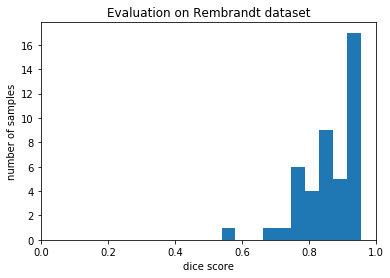

In [14]:
result = np.load(test_result)
print result.keys()
dices = result['dices']
# print dices
print('Average dice score for segmentation evaluation across %d examples = %5f' %(dices.shape[0], np.mean(dices)))

# plot histogram of dice score on all examples
plt.figure()
plt.hist([dices])
plt.xlim(0,1)
plt.title('Evaluation on Rembrandt dataset')
plt.xlabel('dice score')
plt.ylabel('number of samples')
plt.show()

### 1.3 select segmentation samples 

In [13]:
cnn = '/share/PI/ogevaert/shirley/brats_hgg/cnn_eval/dice_results.npz'
fcn = '/share/PI/ogevaert/shirley/brats_hgg/fcn_eval/dice_results.npz'
result_1 = np.load(cnn)
dice_1 = result_1['dices']

result_2 = np.load(fcn)
dice_2 = result_2['dices']

In [17]:
original = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/fcn/fcn_test_result/dice_results.npz'
finetune = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/fcn/eval/dice_results.npz'
result_1 = np.load(original)
dice_1 = result_1['dices']

result_2 = np.load(finetune)
dice_2 = result_2['dices']

In [19]:
original = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/cnn/cnn_test_result/dice_results.npz'
finetune = '/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/cnn/eval/dice_results.npz'
result_1 = np.load(original)
dice_1 = result_1['dices']

result_2 = np.load(finetune)
dice_2 = result_2['dices']

In [20]:
diff = {}
for id in range(len(dice_1)):
    print(result_1['val_ex_paths'][id])
    print(dice_1[id], dice_2[id], dice_2[id] - dice_1[id])

/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF1551=
(0.75050641458473999, 0.79851293329144413, 0.048006518706704138)
/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF0986=
(0.088277414075286414, 0.34766014291469649, 0.25938272883941005)
/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF1191=
(0.84997936442426747, 0.6936656282450675, -0.15631373617919997)
/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF1381=
(0.68644501278772374, 0.50369468834217157, -0.18275032444555217)
/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF1097=
(0.06853016309687561, 0.14654180019290003, 0.078011637096024419)
/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF1185=
(0.37818406710216074, 0.42635333613092741, 0.04816926902876667)
/share/PI/ogevaert/shirley/rembrandt/fine_tune_result/fine_tune_02/test/HF1511=
(0.58078316370536487, 0.66467153712994753, 0.0838883

### 1.3 show segmentation result for each example

In [20]:
# testing result for rembrant dataset
# best test result: #1463 and #1191
test_result_ex = '/share/PI/ogevaert/shirley/rembrandt/test_result/HF1191.npz'

In [19]:
# testing result for brats dataset
test_result_ex = '/share/PI/ogevaert/shirley/brats/test_result/pat374_0801.npz'

In [21]:
result_ex = np.load(test_result_ex)
# print result_ex.keys()

# groudtruth for segmentation
y = result_ex['y']
# prediction for segmentation
pred = result_ex['pred']
# probablity for binary classification (softmax function)
prob = result_ex['prob']
# accuracy by metric dice score
dice = result_ex['dice']

print('dice score = %5f' %(dice))
print('volume size = {}' .format(y.shape))

print pred.shape
print np.where(y == 1)
print np.where(pred == 1)
print prob[np.where(prob>0)][1:50]

dice score = 0.833929
volume size = (53, 256, 256)
(53, 256, 256)
(array([25, 25, 25, ..., 39, 39, 39]), array([125, 125, 125, ..., 132, 132, 133]), array([154, 155, 156, ..., 151, 152, 151]))
(array([10, 10, 10, ..., 39, 39, 39]), array([140, 140, 140, ..., 128, 128, 128]), array([128, 129, 130, ..., 162, 163, 164]))
[  4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473462e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473462e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.99995232e-01
   4.75473917e-06   9.99995232e-01   4.75473917e-06   9.999